 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# Convert the csv into a dataframe that uses DateTime Format
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)

# Confirm nulls have been dropped
whale_returns.isnull().sum()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

# Convert the csv into a dataframe that uses DateTime Format
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)

# Confirm nulls have been dropped
algo_returns.isnull().sum()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

# Convert the csv into a dataframe that uses DateTime Format
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort index to ascending like the other 2 dataframes
sp500_history.sort_index(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Type - Remove dollar sign
sp500_history = sp500_history.replace('[\$,]', '', regex=True)
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Fix Data Type - Convert to float
sp500_history = sp500_history.astype(float)

In [12]:
# Confirm new data type
sp500_history.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename Column
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner")
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

(16497.0, 18009.0)

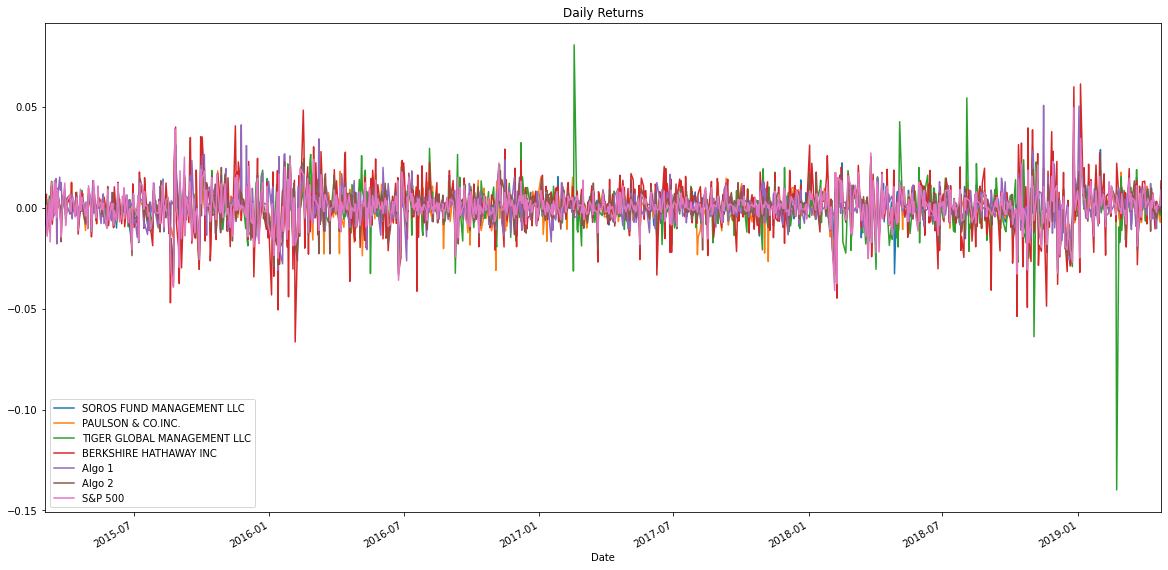

In [17]:
# Plot daily returns
# Fit the x-axis to match the start/end dates of the combined dataframe (2015-03-03 to 2019-04-23)
# https://stackoverflow.com/questions/27425015/python-pandas-timeseries-plots-how-to-set-xlim-and-xticks-outside-ts-plot

xfit = combined_df.plot(figsize=(20,10), title="Daily Returns")
xfit.set_xlim(pd.Timestamp('2015-03-03'), pd.Timestamp('2019-04-23'))

In [18]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,0.372945
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,0.369823
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,0.371986
2019-04-22,0.156280,-0.223061,-0.144348,0.533046,0.925124,0.257151,0.373375
2019-04-23,0.164568,-0.220354,-0.138811,0.553401,0.934691,0.269247,0.385517


(16497.0, 18009.0)

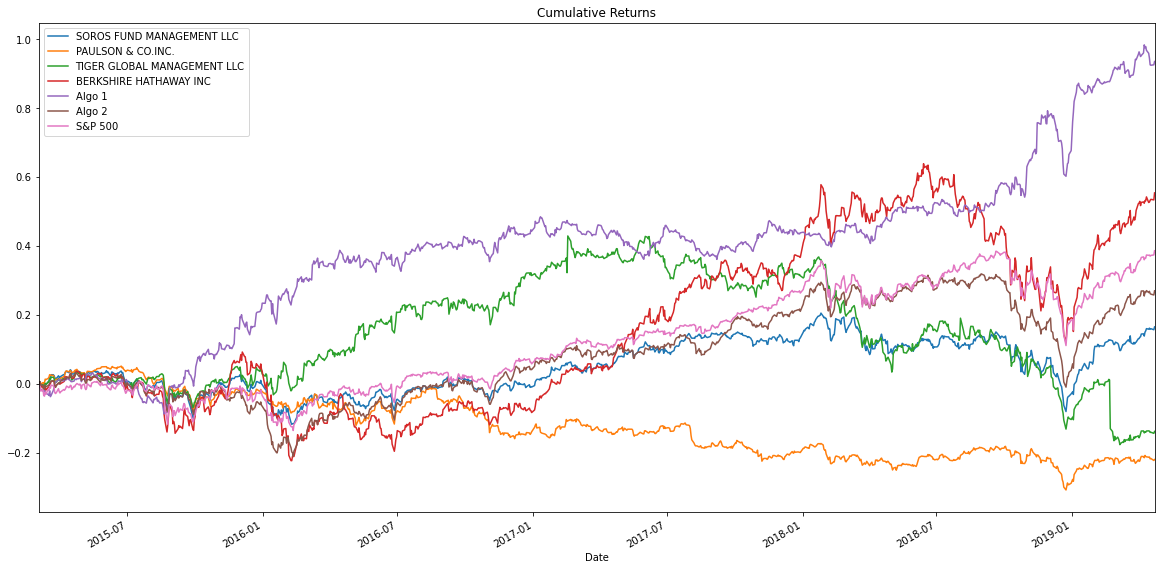

In [19]:
# Plot cumulative returns
xcumlative = cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")
xcumlative.set_xlim(pd.Timestamp('2015-03-03'), pd.Timestamp('2019-04-23'))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

Text(0.5, 1.0, 'Portfolio Risk')

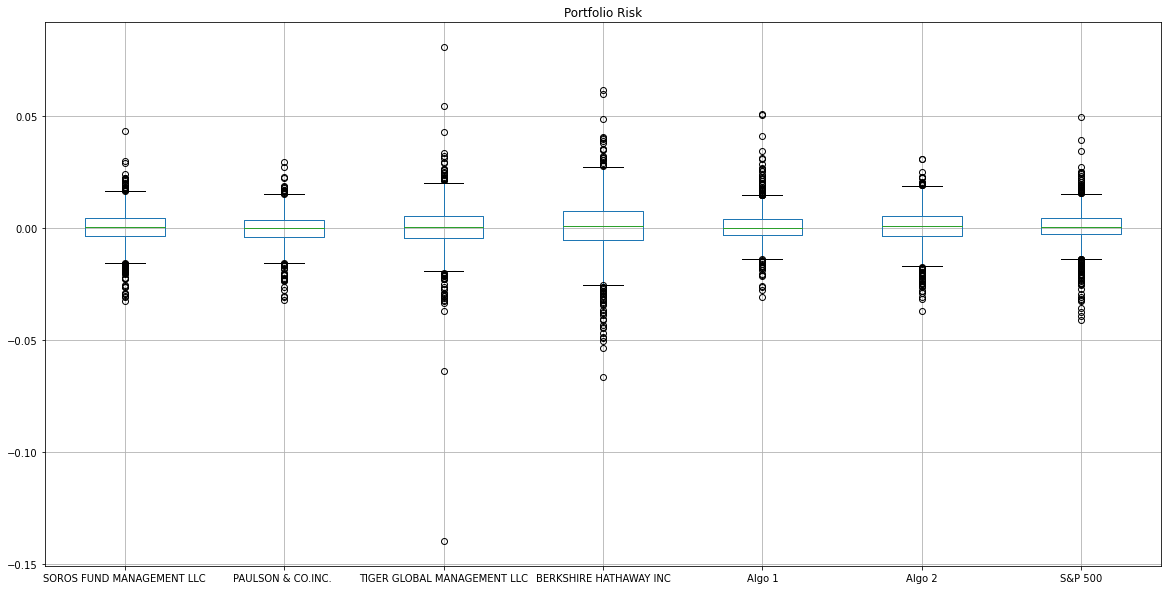

In [20]:
# Create a box plot for each portfolio
# Set Title: https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
# Set Size: https://stackoverflow.com/questions/40125528/modify-pandas-boxplot-output/40126110
box = combined_df.boxplot(figsize=(20,10))
box.set_title('Portfolio Risk')


In [21]:
# Daily Standard Deviations
sd = combined_df.std()
sd

# Which portfolios are riskier than the S&P 500? - See Below

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
# Create Variable for standard deviation of S&P 500
sp_sd = combined_df["S&P 500"].std()
sp_sd

0.008553731597758204

In [23]:
# Return boolean output for standard deviation >= S&P 500
sd_bool = sd

for x in sd:
    if x > sp_sd:
        sd_bool = False
    else:
        sd_bool = True
        
    print(sd_bool)

True
True
False
False
True
True
True


In [24]:
# Calculate the annualized standard deviation (252 trading days)
asd = np.sqrt(252*combined_df.var())
asd

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

(16522.0, 18009.0)

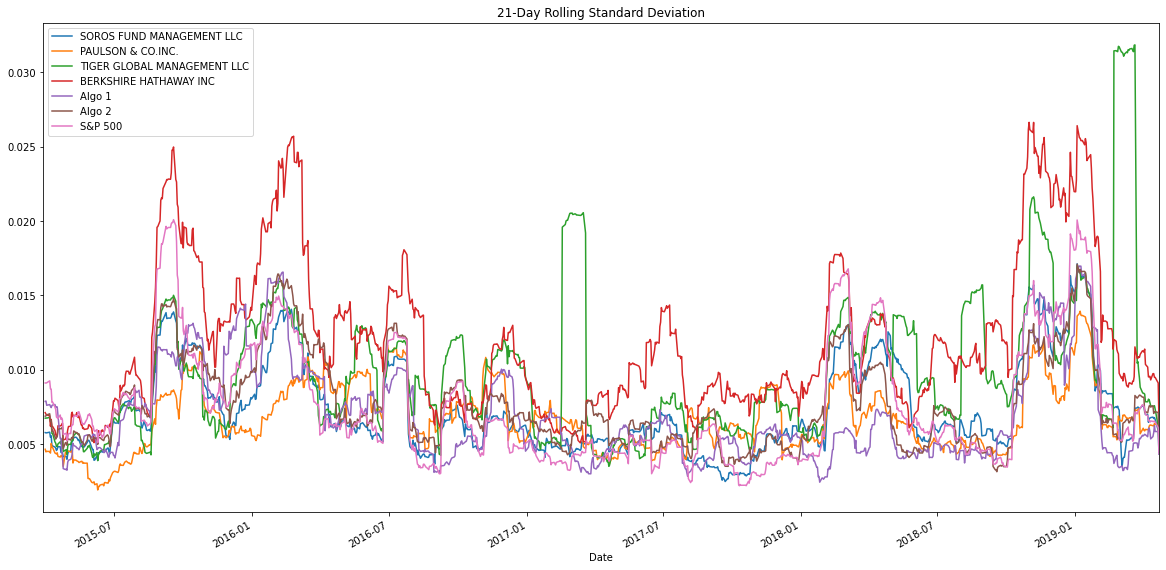

In [25]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_21 = combined_df.rolling(21).std()
rolling_21_plot = rolling_21.plot(figsize=(20,10), title="21-Day Rolling Standard Deviation")
rolling_21_plot.set_xlim(pd.Timestamp('2015-03-28'), pd.Timestamp('2019-04-23'))

In [26]:
# Construct a correlation table
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

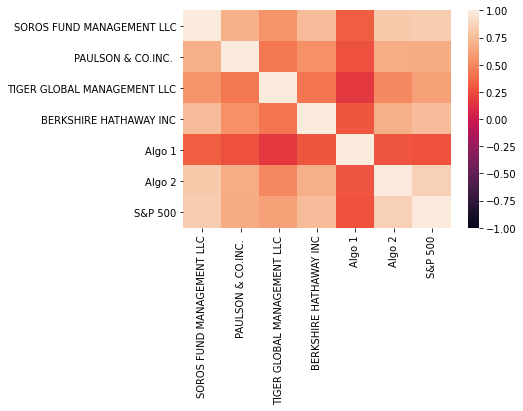

In [27]:
# Visualual representation of corrleation using Seaborn
sns.heatmap(correlation, vmin=-1, vmax=1)

In [28]:
# Calculate rolling 21-day covariance of all daily returns of Berkshire Hathaway Inc vs. S&P 500
algo2_rolling_covariance = combined_df['Algo 2'].rolling(window=21).cov(combined_df['S&P 500'])

# Calculate variance of S&P 500
rolling_variance = combined_df['S&P 500'].rolling(window=21).var()

(16525.0, 18009.0)

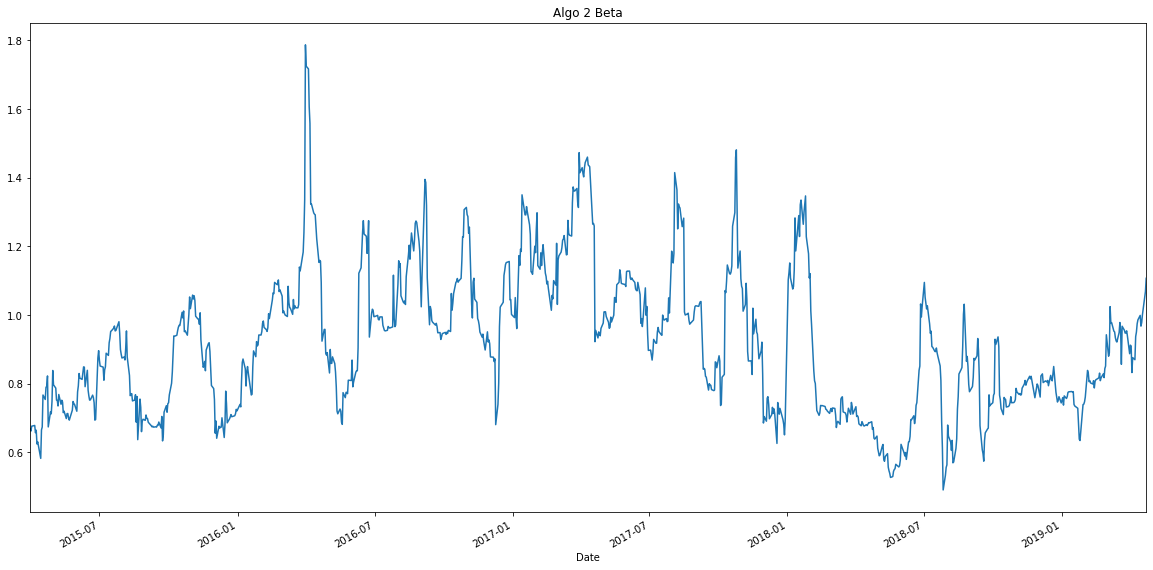

In [29]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
rolling_algo2_beta = algo2_rolling_covariance / rolling_variance

# Using, rolling_algo2_beta.head(30), determined 2015-03-31, is 1st date with data
rolling_algo2_beta = rolling_algo2_beta.plot(figsize=(20,10), title="Algo 2 Beta")
rolling_algo2_beta.set_xlim(pd.Timestamp('2015-03-31'), pd.Timestamp('2019-04-23'))

In [30]:
# Calculate a rolling window using the exponentially weighted moving average.
df_EMA = combined_df

df_EMA['SOROS FUND MANAGEMENT LLC'] = combined_df.iloc[1:,0].ewm(halflife=21).mean()
df_EMA['PAULSON & CO.INC. '] = combined_df.iloc[1:,1].ewm(halflife=21).mean()
df_EMA['TIGER GLOBAL MANAGEMENT LLC'] = combined_df.iloc[1:,2].ewm(halflife=21).mean()
df_EMA['BERKSHIRE HATHAWAY INC'] = combined_df.iloc[1:,3].ewm(halflife=21).mean()
df_EMA['Algo 1'] = combined_df.iloc[1:,4].ewm(halflife=21).mean()
df_EMA['Algo 2'] = combined_df.iloc[1:,5].ewm(halflife=21).mean()
df_EMA['S&P 500'] = combined_df.iloc[1:,6].ewm(halflife=21).mean()

In [31]:
df_EMA.dropna(inplace=True)
df_EMA.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.003138,0.003666,-0.000049,0.005490,-0.004709,0.003385,-0.001550
2015-03-06,-0.000665,0.001172,-0.002953,-0.000911,-0.004794,-0.001727,-0.005898
2015-03-09,-0.000338,0.001974,-0.000644,-0.001106,-0.004966,-0.000932,-0.003314
2015-03-10,-0.002456,0.000413,-0.003085,-0.002948,-0.004203,-0.003327,-0.006227


In [32]:
test_ema = df_EMA

(16525.0, 18009.0)

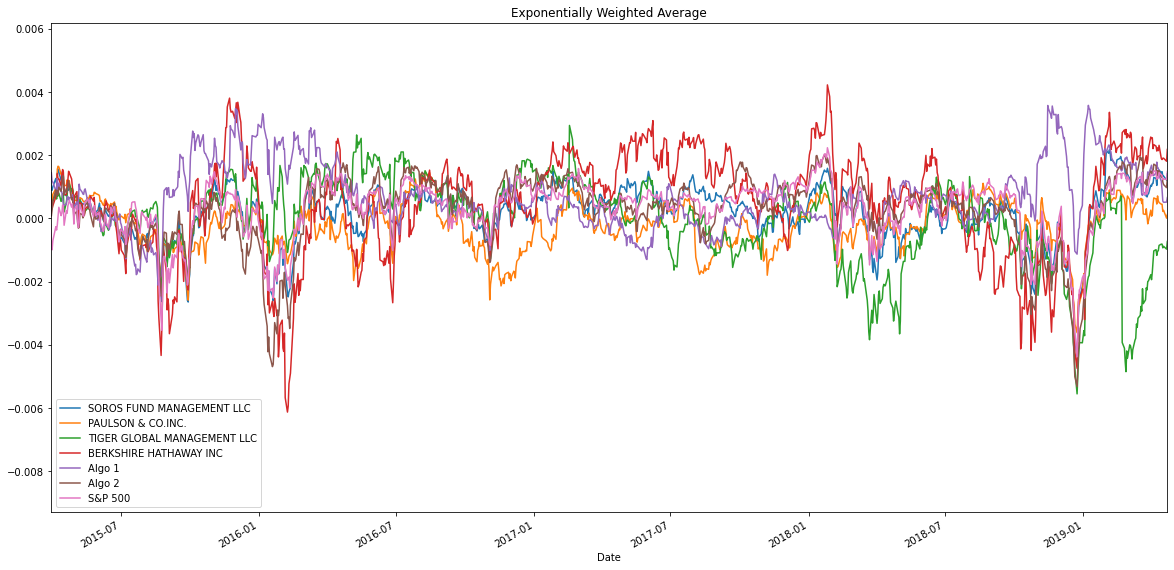

In [33]:
ema = df_EMA.plot(figsize=(20,10), title="Exponentially Weighted Average")
ema.set_xlim(pd.Timestamp('2015-03-31'), pd.Timestamp('2019-04-23'))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [34]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = combined_df.mean() / combined_df.std()
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.178680
PAULSON & CO.INC.             -0.214392
TIGER GLOBAL MANAGEMENT LLC   -0.044777
BERKSHIRE HATHAWAY INC         0.283963
Algo 1                         0.546686
Algo 2                         0.206491
S&P 500                        0.295976
dtype: float64

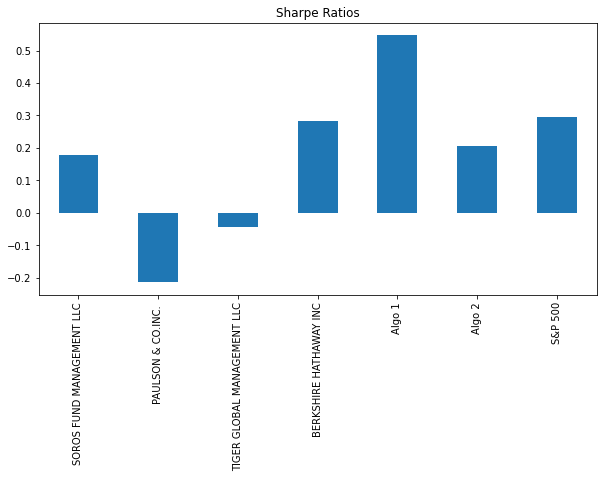

In [35]:
# Visualize the sharpe ratios as a bar plot
sr = sharpe_ratio.plot(kind="bar", figsize=(10,5), title="Sharpe Ratios")


On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Read the first stock: Target
tgt_csv = Path("Stock/TGT.csv")

# Convert the csv into a dataframe that uses DateTime Format
tgt = pd.read_csv(tgt_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
tgt.columns = ["TGT-Price"]

# Calculate the daily returns and add it to the dataframe
tgt["TGT"] = tgt.pct_change()

# Drop nulls
tgt.dropna(inplace=True)
tgt.head()

,TGT-Price,TGT
Date,,
2019-01-03 16:00:00,65.53,-0.013697
2019-01-04 16:00:00,66.43,0.013734
2019-01-07 16:00:00,69.68,0.048924
2019-01-08 16:00:00,69.61,-0.001005
2019-01-09 16:00:00,70.29,0.009769


In [37]:
# Read the second stock: Walmart
wmt_csv = Path("Stock/WMT.csv")

# Convert the csv into a dataframe that uses DateTime Format
wmt = pd.read_csv(wmt_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
wmt.columns = ["WMT-Price"]

# Calculate the daily returns and add it to the dataframe
wmt["WMT"] = wmt.pct_change()

# Drop nulls
wmt.dropna(inplace=True)
wmt.head()

,WMT-Price,WMT
Date,,
2019-01-03 16:00:00,92.86,-0.005142
2019-01-04 16:00:00,93.44,0.006246
2019-01-07 16:00:00,94.54,0.011772
2019-01-08 16:00:00,95.20,0.006981
2019-01-09 16:00:00,94.89,-0.003256


In [38]:
# Read the third stock: Kroger
kr_csv = Path("Stock/KR.csv")

# Convert the csv into a dataframe that uses DateTime Format
kr = pd.read_csv(kr_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
kr.columns = ["KR-Price"]

# Calculate the daily returns and add it to the dataframe
kr["KR"] = kr.pct_change()

# Drop nulls
kr.dropna(inplace=True)
kr.head()

,KR-Price,KR
Date,,
2019-01-03 16:00:00,27.35,0.001832
2019-01-04 16:00:00,27.66,0.011335
2019-01-07 16:00:00,27.92,0.009400
2019-01-08 16:00:00,28.46,0.019341
2019-01-09 16:00:00,28.05,-0.014406


In [39]:
# Read the fourth stock: Albertsons
aci_csv = Path("Stock/ACI.csv")

# Convert the csv into a dataframe that uses DateTime Format
aci = pd.read_csv(aci_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
aci.columns = ["ACI-Price"]

# Calculate the daily returns and add it to the dataframe
aci["ACI"] = aci.pct_change()

# Drop nulls
aci.dropna(inplace=True)
aci.head()

,ACI-Price,ACI
Date,,
2020-06-29 16:00:00,15.57,0.007767
2020-06-30 16:00:00,15.77,0.012845
2020-07-01 16:00:00,15.76,-0.000634
2020-07-02 16:00:00,15.81,0.003173
2020-07-06 16:00:00,15.52,-0.018343


In [40]:
# Concatenate all stocks into a single DataFrame
stock = pd.concat([tgt, wmt, kr, aci], axis="columns", join="inner")

# Format index to drop time
stock.index = pd.to_datetime(stock.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')
stock.head()

,TGT-Price,TGT,WMT-Price,WMT,KR-Price,KR,ACI-Price,ACI
Date,,,,,,,,
2020-06-29,118.57,0.013246,119.06,0.006254,34.13,0.044370,15.57,0.007767
2020-06-30,119.93,0.011470,119.78,0.006047,33.85,-0.008204,15.77,0.012845
2020-07-01,118.96,-0.008088,119.69,-0.000751,33.57,-0.008272,15.76,-0.000634
2020-07-02,119.12,0.001345,119.21,-0.004010,33.50,-0.002085,15.81,0.003173
2020-07-06,119.24,0.001007,118.89,-0.002684,33.73,0.006866,15.52,-0.018343


In [41]:
# Separate stock price data and stock return data into separate dataframes
stock_price = stock.drop(['TGT', 'WMT', 'KR', 'ACI'], axis=1)
stock_price.head()

,TGT-Price,WMT-Price,KR-Price,ACI-Price
Date,,,,
2020-06-29,118.57,119.06,34.13,15.57
2020-06-30,119.93,119.78,33.85,15.77
2020-07-01,118.96,119.69,33.57,15.76
2020-07-02,119.12,119.21,33.50,15.81
2020-07-06,119.24,118.89,33.73,15.52


In [42]:
stock_returns = stock.drop(['TGT-Price', 'WMT-Price', 'KR-Price', 'ACI-Price'], axis=1)
stock_returns.head()

,TGT,WMT,KR,ACI
Date,,,,
2020-06-29,0.013246,0.006254,0.044370,0.007767
2020-06-30,0.011470,0.006047,-0.008204,0.012845
2020-07-01,-0.008088,-0.000751,-0.008272,-0.000634
2020-07-02,0.001345,-0.004010,-0.002085,0.003173
2020-07-06,0.001007,-0.002684,0.006866,-0.018343


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4, 1/4]
portfolio_returns = stock_returns * weights
portfolio_returns['Portfolio'] = portfolio_returns['TGT'] + portfolio_returns['WMT'] + portfolio_returns['KR'] + portfolio_returns['ACI'] 
portfolio_returns

,TGT,WMT,KR,ACI,Portfolio
Date,,,,,
2020-06-29,0.003311,0.001564,0.011092,0.001942,0.017909
2020-06-30,0.002868,0.001512,-0.002051,0.003211,0.005540
2020-07-01,-0.002022,-0.000188,-0.002068,-0.000159,-0.004436
2020-07-02,0.000336,-0.001003,-0.000521,0.000793,-0.000394
2020-07-06,0.000252,-0.000671,0.001716,-0.004586,-0.003289
...,...,...,...,...,...
2020-12-23,0.003713,-0.001699,0.004047,-0.004111,0.001950
2020-12-24,0.000400,0.000489,0.001115,0.003215,0.005219
2020-12-28,0.001712,0.002997,-0.001110,0.003651,0.007250


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_df = pd.concat([stock_returns, portfolio_returns['Portfolio']], axis="columns", join="inner")
portfolio_df.head()

,TGT,WMT,KR,ACI,Portfolio
Date,,,,,
2020-06-29,0.013246,0.006254,0.044370,0.007767,0.017909
2020-06-30,0.011470,0.006047,-0.008204,0.012845,0.005540
2020-07-01,-0.008088,-0.000751,-0.008272,-0.000634,-0.004436
2020-07-02,0.001345,-0.004010,-0.002085,0.003173,-0.000394
2020-07-06,0.001007,-0.002684,0.006866,-0.018343,-0.003289


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_df.dropna(inplace=True)
portfolio_df.head()

,TGT,WMT,KR,ACI,Portfolio
Date,,,,,
2020-06-29,0.013246,0.006254,0.044370,0.007767,0.017909
2020-06-30,0.011470,0.006047,-0.008204,0.012845,0.005540
2020-07-01,-0.008088,-0.000751,-0.008272,-0.000634,-0.004436
2020-07-02,0.001345,-0.004010,-0.002085,0.003173,-0.000394
2020-07-06,0.001007,-0.002684,0.006866,-0.018343,-0.003289


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [46]:
# Risk
portfolio_sd = portfolio_df.std()
portfolio_sd

TGT          0.016184
WMT          0.014167
KR           0.015290
ACI          0.018980
Portfolio    0.011039
dtype: float64

In [47]:
# Rolling
portfolio_rolling = portfolio_df.rolling(21).std()
portfolio_rolling.dropna(inplace=True)

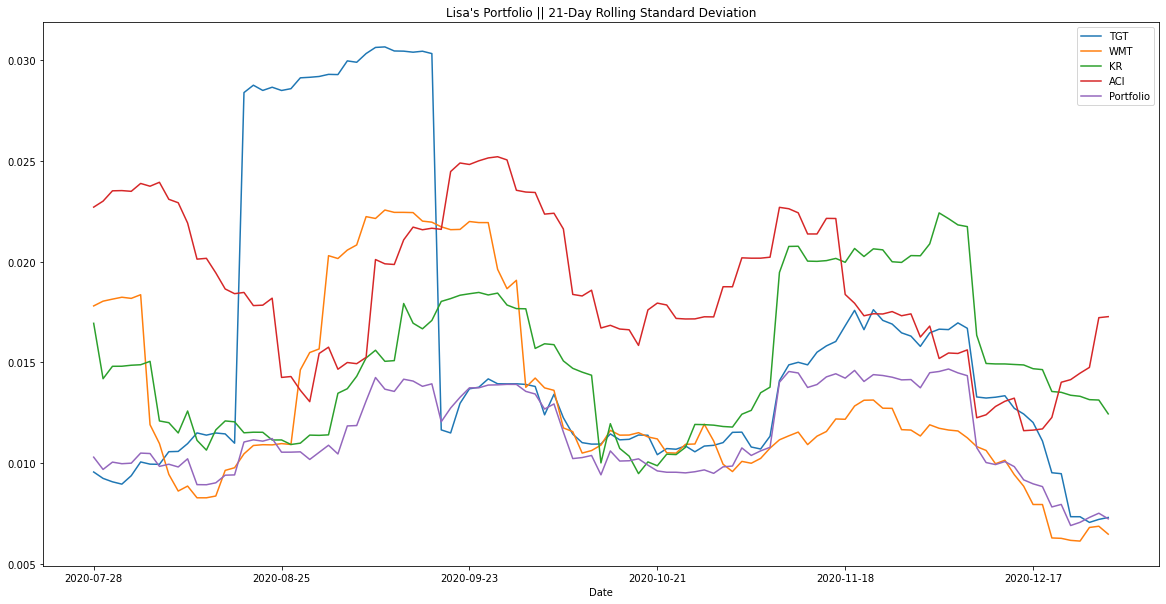

In [48]:
portfolio_rolling_plot = portfolio_rolling.plot(figsize=(20,10), title="Lisa's Portfolio || 21-Day Rolling Standard Deviation")

In [49]:
# Annualized Sharpe Ratios
portfolio_sharpe_ratios = portfolio_df.mean() / portfolio_df.std()
portfolio_sharpe_ratios

TGT          0.197725
WMT          0.115167
KR          -0.010188
ACI          0.044853
Portfolio    0.125176
dtype: float64

<AxesSubplot:title={'center':"Lisa's Porfolio || Sharpe Ratios"}>

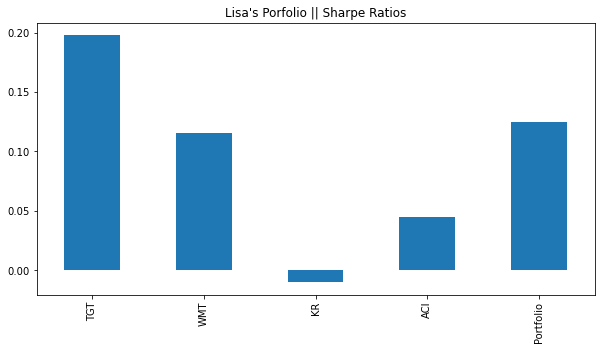

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_bar = portfolio_sharpe_ratios.plot(kind="bar", figsize=(10,5), title="Lisa's Porfolio || Sharpe Ratios")
sharpe_bar

In [51]:
# Create a correlation analysis
# Construct a correlation table
portfolio_correlation = portfolio_df.corr()
portfolio_correlation

,TGT,WMT,KR,ACI,Portfolio
TGT,1.000000,0.197651,0.376306,0.281315,0.681184
WMT,0.197651,1.000000,0.329646,0.179689,0.584682
KR,0.376306,0.329646,1.000000,0.351187,0.740938
ACI,0.281315,0.179689,0.351187,1.000000,0.712229
Portfolio,0.681184,0.584682,0.740938,0.712229,1.000000


<AxesSubplot:>

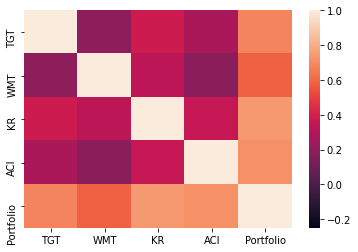

In [52]:
# Visualual representation of corrleation using Seaborn
sns.heatmap(portfolio_correlation, vmin=-.25, vmax=1)

In [53]:
# Read the index: S&P 60 TSX
tx60_csv = Path("Stock/TX60.csv")

# Convert the csv into a dataframe that uses DateTime Format
tx60 = pd.read_csv(tx60_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
tx60.columns = ["TX60-Price"]

# Calculate the daily returns and add it to the dataframe
tx60["TX60"] = tx60.pct_change()

# Format index to drop time
tx60.index = pd.to_datetime(tx60.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')

# Concatonate with portfolio_df
tx60_df = pd.concat([portfolio_df, tx60['TX60']], axis="columns", join="inner")

# Drop nulls
tx60_df.dropna(inplace=True)
tx60_df.head()

,TGT,WMT,KR,ACI,Portfolio,TX60
Date,,,,,,
2020-06-29,0.013246,0.006254,0.044370,0.007767,0.017909,0.014143
2020-06-30,0.011470,0.006047,-0.008204,0.012845,0.005540,0.006041
2020-07-02,0.001345,-0.004010,-0.002085,0.003173,-0.000394,0.007118
2020-07-06,0.001007,-0.002684,0.006866,-0.018343,-0.003289,0.003077
2020-07-07,-0.009896,0.067794,-0.001482,-0.021907,0.008627,-0.004797


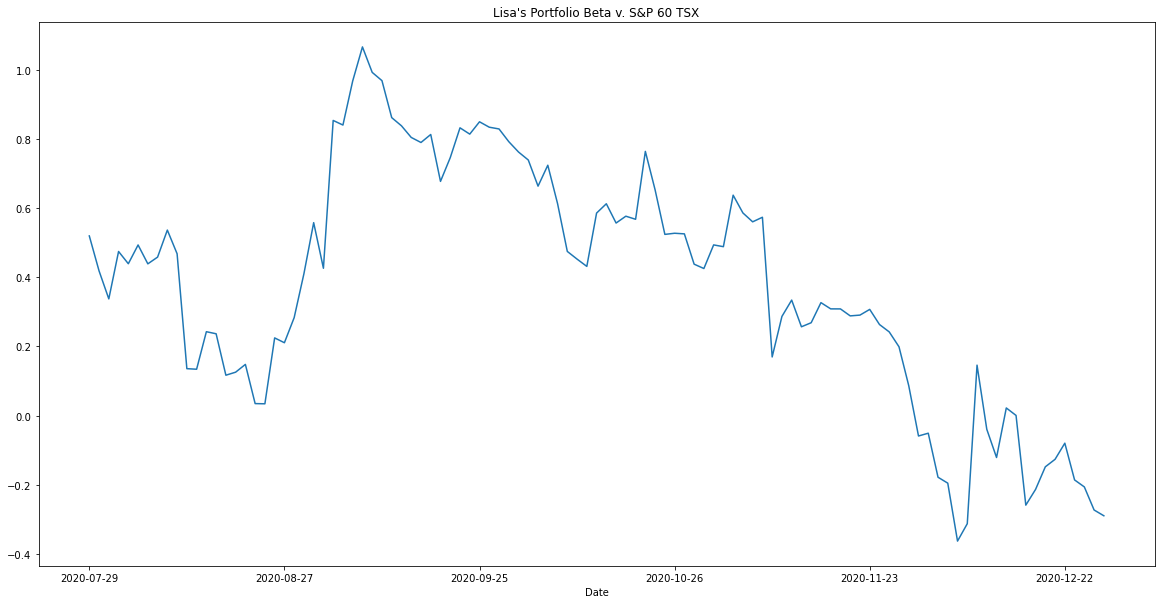

In [54]:
# Calculate rolling 21-day covariance of all daily returns of my portfolio
portfolio_rolling_covariance = tx60_df['Portfolio'].rolling(window=21).cov(tx60_df['TX60'])

# Calculate variance of all daily returns of S&P 60 TSX index
index_rolling_variance = tx60_df['TX60'].rolling(window=21).var()

# Calculate Beta for a single portfolio compared to the total market (S&P 500)
portfolio_rolling_beta = portfolio_rolling_covariance / index_rolling_variance
portfolio_rolling_beta.dropna(inplace=True)

# Using, rolling_algo2_beta.head(30), determined 2015-03-31, is 1st date with data
portfolio_rolling_beta_plot = portfolio_rolling_beta.plot(figsize=(20,10), title="Lisa's Portfolio Beta v. S&P 60 TSX")

In [55]:
# Beta
portfolio_rolling_beta

Date
2020-07-29    0.519855
2020-07-30    0.418612
2020-07-31    0.337583
2020-08-04    0.474814
2020-08-05    0.439341
                ...   
2020-12-22   -0.080071
2020-12-23   -0.186436
2020-12-24   -0.206682
2020-12-29   -0.273454
2020-12-30   -0.290195
Length: 105, dtype: float64